In [1]:
# import the packages
import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# laod the data
df=pandas.read_csv(r"E:\MLIoT\ML\dataset\Bank_churn_modelling.csv")
print(df.shape)
df.head()

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# check for impact of creditscore
plt.figure(figsize=(8,4))
sns.distplot(df['CreditScore'][df['Exited']==0])
sns.distplot(df['CreditScore'][df['Exited']==1])
plt.legend(['0','1'])
plt.show()

In [ ]:
# check for impact of Age
plt.figure(figsize=(8,4))
sns.distplot(df['Age'][df['Exited']==0])
sns.distplot(df['Age'][df['Exited']==1])
plt.legend(['0','1'])
plt.show()

In [3]:
# check for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
# drop duplicates
df.drop_duplicates(inplace=True)
print(df.shape)

(10000, 14)


In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# dropping some unwanted columns
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

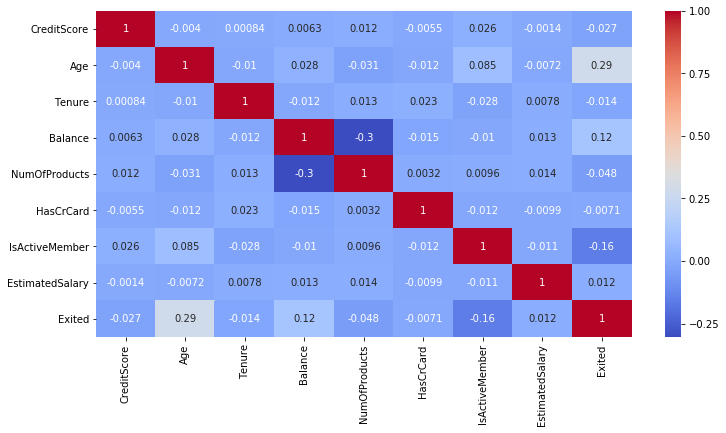

In [7]:
# correlation analysis
cor=df.corr()
# visualize the correlation matrix
plt.figure(figsize=(12,6))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

In [8]:
x=df.drop(['Exited'],axis=1)
y=df['Exited']

In [9]:
print(x.head())

   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1        101348.88  
1          0               1        112542.58  
2          1               0        113931.57  
3          0               0         93826.63  
4          1               1         79084.10  


In [10]:
# encode the categorical features - Geography and Gender
from sklearn.preprocessing import LabelEncoder
#for Geography
le1=LabelEncoder()
x['Geography']=le1.fit_transform(x['Geography'])
#for Gender
le2=LabelEncoder()
x['Gender']=le2.fit_transform(x['Gender'])

In [11]:
df.head(8)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1


In [12]:
x.head(8)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
5,645,2,1,44,8,113755.78,2,1,0,149756.71
6,822,0,1,50,7,0.00,2,1,1,10062.80
7,376,1,0,29,4,115046.74,4,1,0,119346.88


In [13]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(categorical_features=[1])# categorical_features=column num
x=ohe.fit_transform(x).toarray()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [14]:
print(x[:8,:10].astype('int32'))
df.head(8)

[[     1      0      0    619      0     42      2      0      1      1]
 [     0      0      1    608      0     41      1  83807      1      0]
 [     1      0      0    502      0     42      8 159660      3      1]
 [     1      0      0    699      0     39      1      0      2      0]
 [     0      0      1    850      0     43      2 125510      1      1]
 [     0      0      1    645      1     44      8 113755      2      1]
 [     1      0      0    822      1     50      7      0      2      1]
 [     0      1      0    376      0     29      4 115046      4      1]]


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1


In [15]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [16]:
# split the data into trian and test set - 80% for train and 20% for test set
numpy.random.seed(5)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)
print(x.shape)
print(xtrain.shape)
print(xtest.shape)

(10000, 12)
(8000, 12)
(2000, 12)


In [17]:
# apply logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression() # create model as an object of type logisticregression

In [18]:
# train the model using train data
numpy.random.seed(5)
model.fit(xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
# evaluating the performance of the model
ypred=model.predict(xtest)
from sklearn import metrics
metrics.accuracy_score(ytest,ypred)

0.809

In [20]:
# calculate the recall
metrics.recall_score(ytest,ypred)

0.19753086419753085

In [21]:
metrics.confusion_matrix(ytest,ypred)

array([[1538,   57],
       [ 325,   80]], dtype=int64)